# Quais são as palavras mais usadas por Cauê Moura em seu canal no Youtube? #

<img src="moura.jpeg" alt="Drawing" style="width: 400px;"/>

Esta é uma análise textual de legendas de vídeos no Youtube feita a partir do uso de duas bibliotecas do Python: YTstats, que permite obter uma lista de vídeos de qualquer canal da plataforma, e youtube_transcript_api, que permite o download automatizado de legendas.

**Metodologia:** analisei o conteúdo de 500 vídeos do canal [@cauemourama](https://www.youtube.com/c/cauemoura), de 2014 a 2022. A ideia inicial era analisar todos, mas o raspador (ou possivelmente este que lhes escreve) tem limitações. Desses vídeos, foi possível extrair automaticamente a legenda de 466. Como as legendas do Youtube são geradas automaticamente, é **provável** que boa parte das palavras estejam incorretas ou incompletas. Muitos termos acabam sendo transcritos de forma diferente, o que pode prejudicar a precisão da análise do texto. Mas o objetivo deste curto projeto **não** é, obviamente, fazer uma avaliação rigorosa do texto, mas somente um exercício de programação.


Este é um projeto experimental de análise de dados feito exclusivamente por entretenimento. Não há **nenhuma** intenção de publicar este conteúdo profissionalmente, já que se trata somente de um teste para treinar programação durante um curso que estou fazendo. 

In [4]:
# import libraries
import pandas as pd
import json
from tqdm import tqdm
from yt_stats import YTstats
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from youtube_transcript_api import YouTubeTranscriptApi
% matplotlib inline

/Users/luizfernandotoledo/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
UsageError: Line magic function `%` not found.


In [169]:
#yt api key - you need to create your own key - 
API_KEY = 'xxxx'
channel_id = 'xxxx'

In [6]:
#test api
yt = YTstats(API_KEY, channel_id)
part = 'statistics'
a = yt._get_single_video_data('pICyxTI6CMg',part)
a

{'viewCount': '68773',
 'likeCount': '19169',
 'favoriteCount': '0',
 'commentCount': '984'}

In [5]:
# extract the data about the channel 
yt = YTstats(API_KEY, channel_id)
yt.extract_all()

get channel statistics...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  7.97it/s]

get video data...



  3%|█▏                                        | 14/501 [00:07<04:14,  1.92it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': '7HwtFBc7_6wu3ckAszWsdOJgQDU', 'items': [{'kind': 'youtube#video', 'etag': 'KlBP5rwmixNrzer5z4BRSIGhWik', 'id': '_gYmPMrZaQU'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


  5%|██                                        | 25/501 [00:13<04:02,  1.96it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': '4qSnRNFpFclObXZIARRB_Fboulc', 'items': [{'kind': 'youtube#video', 'etag': '4attSMO9LdxdYLju5HFC0MWuNyw', 'id': '7I7jJZNGQ5s'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 18%|███████▍                                  | 89/501 [00:45<03:38,  1.89it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'ktvi4Jn1U8dQ2jEozcdVfjwCkcg', 'items': [{'kind': 'youtube#video', 'etag': '0tQwITA7G1kqlmEv4fjn48RqFJo', 'id': 'wN3Cop2NZUg'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 25%|██████████                               | 123/501 [01:03<03:13,  1.96it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': '4EOygLXnFy8VA8A19yn7t6YNQUc', 'items': [{'kind': 'youtube#video', 'etag': 'uJSWHY1jQzQsPCFQiZZOGuhMoHc', 'id': 'pIo0Nsc2d_A'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 34%|█████████████▉                           | 170/501 [01:27<02:46,  1.99it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': '1VpHsy9NOlij0SoUnp4pAs79Qcc', 'items': [{'kind': 'youtube#video', 'etag': 'txujfFGCcqmwbRAoNt2_2EBJMBs', 'id': 'Gl8UvH8_0HY'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 37%|███████████████▏                         | 186/501 [01:35<02:41,  1.94it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': '0rckc0TPflK0AhUr7BrSjdhLmXU', 'items': [{'kind': 'youtube#video', 'etag': 'WV6BrSld4tNDBRVguLDyVG0B3G8', 'id': 'pLXGqXtGjss'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 40%|████████████████▌                        | 202/501 [01:44<02:38,  1.88it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'gg6fTl0FVCgN0FjiH-8FTork_pE', 'items': [{'kind': 'youtube#video', 'etag': 'DwVNgfw_ziqG_P8hf9hgLeMw0Ws', 'id': 'YP-M00mKiE4'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 43%|█████████████████▌                       | 214/501 [01:50<02:27,  1.94it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'lYK_N8HMClWsF7_bexKp10b3FpI', 'items': [{'kind': 'youtube#video', 'etag': 'ttVL6BCeThuloll8uAe_T2yM2DY', 'id': 'NaI8gMNgS1k'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 53%|█████████████████████▉                   | 268/501 [02:19<02:01,  1.91it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'cYjfQ38OvOcww_ES5V13-_PyFvo', 'items': [{'kind': 'youtube#video', 'etag': '0Ur3NKddbaeyXQ1lM5O4FUBcWuY', 'id': 'm5bXFMSuv5g'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 67%|███████████████████████████▋             | 338/501 [02:56<01:26,  1.89it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'pMafxKL4nC8l4Is27YlSKkSW21g', 'items': [{'kind': 'youtube#video', 'etag': '1wFJxJ7ZL4FFOP8JtmgfopJpDRI', 'id': 'YmCZ2QdWkxE'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 68%|███████████████████████████▉             | 342/501 [02:58<01:24,  1.88it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'tApQB61I_XOB9DUqitLs0SouU04', 'items': [{'kind': 'youtube#video', 'etag': 'CO-G4BfsaCBRSnWU1E4tF6TnHs8', 'id': 'Njee6Hu-Zyw'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 69%|████████████████████████████▍            | 348/501 [03:01<01:18,  1.95it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'yZq3XdlUzmxZkBersoPMylNmL7c', 'items': [{'kind': 'youtube#video', 'etag': 'sceTzZo6Ai4S9wLgZ6R6TT9kBOo', 'id': 'mOtKQ0FlSuM'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 70%|████████████████████████████▌            | 349/501 [03:02<01:18,  1.95it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'qFIA-LG_MpsfZQ8PF3Or2TQQvME', 'items': [{'kind': 'youtube#video', 'etag': '-EJzA7CHbJqATe8zxmOag9xmF2w', 'id': '0XdPt3k8rcw'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 70%|████████████████████████████▋            | 351/501 [03:03<01:13,  2.05it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'My0iFuoBF--su5bGmMa3MqlS_20', 'items': [{'kind': 'youtube#video', 'etag': 'Se_LrnfmqFnBUjb7ml9v3gLCncw', 'id': 'tiGrHI8AiX8'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 83%|██████████████████████████████████▏      | 418/501 [03:40<00:43,  1.92it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'soDixGGa2mJPZHhd4oQTihCn7H8', 'items': [{'kind': 'youtube#video', 'etag': 'DRHt2JUs11qbBBHMfxLpE9FwN18', 'id': 'esfqaSwkv20'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


 86%|███████████████████████████████████▍     | 433/501 [03:48<00:33,  2.02it/s]

Error! Could not get topicDetails part of data: 
{'kind': 'youtube#videoListResponse', 'etag': 'ElL7CrOMZW7Xk8v-tr1LcUllDHk', 'items': [{'kind': 'youtube#video', 'etag': '4X91eX3CSn4Q15bZuKRvzRv2cMQ', 'id': 'ucX-JpUMT3c'}], 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}


100%|█████████████████████████████████████████| 501/501 [04:22<00:00,  1.91it/s]


In [6]:
# create a json file with the extracted data
yt.dump()

file dumped to caue_moura.json


In [7]:
# open document and find the video ids

with open('/Users/luizfernandotoledo/Desktop/Code_folder/Columbia_J_School/Data_studio/Projects/Project 3 - Youtube/caue_moura.json', 'r') as f:
  data = json.load(f)


list_of_youtube_ids = []
for a in data['UCm2CE2YfpmobBmF8ARLPzAw']['video_data'].keys():
    list_of_youtube_ids.append(a)

list_of_youtube_ids
lista_menor = list_of_youtube_ids[0:5]


In [8]:
#check if it works
list_of_youtube_ids

['pICyxTI6CMg',
 '-l64HIDbg9Q',
 '3EXvDot9Dfw',
 'obwBeZ4uHXE',
 'dINufW0XlsQ',
 'OAxZTdhr4Hk',
 'p3SCjreg604',
 'c1vYs1WQkQg',
 'KeCw_50A3GE',
 'ahQkNpa-OoM',
 'cK54pkAzC-0',
 'fB7zEBlpFCk',
 'hGscH1pU-sM',
 '_gYmPMrZaQU',
 '0AbJAgkXt5U',
 'Sb7uaOK7wbQ',
 'Mg0MOc1CiQ4',
 'DzCvoI4YSjI',
 'wT0ECAQBE2c',
 'II80c3Xf2Mk',
 'Wcp5MHN1nW0',
 'ii30sWT9h4k',
 'DVv0ZQta-Ew',
 'Z_TozCXwr6M',
 '7I7jJZNGQ5s',
 '99S4vnI880c',
 'xhHjXjjV-30',
 '3LVPXF4rXS8',
 'zDj44iMfmEo',
 'DrtVIzHYpeU',
 '0Jt5W_V2B0Y',
 'iy28P3hnwr4',
 'OkqXPvgbuP0',
 'ukhE5jSIS5M',
 '5fhkwclLNG4',
 'Cig7Npfh_ds',
 'wqxeBijCxEM',
 'SxERB60BN74',
 'PUyzm398Zd0',
 'GVPo9qhK2A8',
 'NQWwktUcSVk',
 'lCzl2SNW9Eo',
 'z8IWcTCWans',
 '9D1yUcK0egI',
 'QXVyF_7VyoY',
 'sUwdiouM_Ws',
 'Se-BNRm4_-Q',
 'JU1hk-gdA68',
 'UFeobLTxiBQ',
 '5qAnYkjHxiI',
 '0-PWtth-hJU',
 'gNNfNByzzBA',
 'gYW6c5I3ixc',
 '-hzqTK5X4yg',
 'm8BRHVtGjI4',
 'AHz7OkM1Cg4',
 'UEy1icKhtp0',
 'EMDQDn8nN-8',
 'ZSWpSzM6JTk',
 'X_aTTbLPYF0',
 'tNFV0E-B2BM',
 '9syRbslHI_Q',
 'y68mF8

In [9]:
# all videos links
links_list = []
for ids in list_of_youtube_ids:
    links_list.append('https://www.youtube.com/watch?v=' + ids)
links_list
    

['https://www.youtube.com/watch?v=pICyxTI6CMg',
 'https://www.youtube.com/watch?v=-l64HIDbg9Q',
 'https://www.youtube.com/watch?v=3EXvDot9Dfw',
 'https://www.youtube.com/watch?v=obwBeZ4uHXE',
 'https://www.youtube.com/watch?v=dINufW0XlsQ',
 'https://www.youtube.com/watch?v=OAxZTdhr4Hk',
 'https://www.youtube.com/watch?v=p3SCjreg604',
 'https://www.youtube.com/watch?v=c1vYs1WQkQg',
 'https://www.youtube.com/watch?v=KeCw_50A3GE',
 'https://www.youtube.com/watch?v=ahQkNpa-OoM',
 'https://www.youtube.com/watch?v=cK54pkAzC-0',
 'https://www.youtube.com/watch?v=fB7zEBlpFCk',
 'https://www.youtube.com/watch?v=hGscH1pU-sM',
 'https://www.youtube.com/watch?v=_gYmPMrZaQU',
 'https://www.youtube.com/watch?v=0AbJAgkXt5U',
 'https://www.youtube.com/watch?v=Sb7uaOK7wbQ',
 'https://www.youtube.com/watch?v=Mg0MOc1CiQ4',
 'https://www.youtube.com/watch?v=DzCvoI4YSjI',
 'https://www.youtube.com/watch?v=wT0ECAQBE2c',
 'https://www.youtube.com/watch?v=II80c3Xf2Mk',
 'https://www.youtube.com/watch?v=Wcp5MH

In [16]:
# lista de legendas para os 500 videos que encontramos
list_of_subtitles = []

for srt in tqdm(list_of_youtube_ids):
    try:
        subtitle = YouTubeTranscriptApi.get_transcript(srt, languages=['pt'])
        list_of_subtitles.append(subtitle)
    except:
        print(f' The video with the ID {srt} is not working')
        pass
        


  5%|██▎                                       | 27/500 [00:19<05:15,  1.50it/s]

 The video with the ID xhHjXjjV-30 is not working


  7%|██▊                                       | 33/500 [00:23<05:08,  1.52it/s]

 The video with the ID OkqXPvgbuP0 is not working


 10%|████                                      | 48/500 [00:34<04:58,  1.51it/s]

 The video with the ID JU1hk-gdA68 is not working


 12%|████▉                                     | 59/500 [00:42<05:21,  1.37it/s]

 The video with the ID ZSWpSzM6JTk is not working


 15%|██████▍                                   | 77/500 [00:55<04:39,  1.51it/s]

 The video with the ID uDIrWO6FxBo is not working


 16%|██████▌                                   | 78/500 [00:56<04:25,  1.59it/s]

 The video with the ID PlhxNvzwJV0 is not working


 16%|██████▋                                   | 80/500 [00:57<04:20,  1.61it/s]

 The video with the ID cTEoKml3AF4 is not working


 17%|███████                                   | 84/500 [01:00<04:29,  1.54it/s]

 The video with the ID 2Q73iXMW37g is not working


 17%|███████▎                                  | 87/500 [01:02<04:30,  1.53it/s]

 The video with the ID dDtj8R71U0Q is not working


 18%|███████▍                                  | 88/500 [01:02<04:14,  1.62it/s]

 The video with the ID 463QV6LxsEs is not working


 18%|███████▍                                  | 89/500 [01:03<03:51,  1.77it/s]

 The video with the ID wN3Cop2NZUg is not working


 18%|███████▌                                  | 90/500 [01:03<04:18,  1.58it/s]

 The video with the ID YvMqSvrOHTI is not working


 18%|███████▋                                  | 92/500 [01:05<04:10,  1.63it/s]

 The video with the ID CW1ntsVTXkM is not working


 19%|███████▊                                  | 93/500 [01:05<04:08,  1.64it/s]

 The video with the ID 990Al3LpOJg is not working


 22%|████████▊                                | 108/500 [01:15<04:07,  1.59it/s]

 The video with the ID GnDCeNdhXew is not working


 24%|█████████▉                               | 121/500 [01:25<04:08,  1.53it/s]

 The video with the ID BZAouVKcqw4 is not working


 25%|██████████▏                              | 124/500 [01:27<04:18,  1.45it/s]

 The video with the ID LfcI-EvcS_4 is not working


 25%|██████████▎                              | 125/500 [01:27<04:08,  1.51it/s]

 The video with the ID X97jlXuD3qw is not working


 25%|██████████▎                              | 126/500 [01:28<03:51,  1.61it/s]

 The video with the ID 7lgG19_bEvg is not working


 25%|██████████▍                              | 127/500 [01:29<03:44,  1.66it/s]

 The video with the ID sDtA4S3lza0 is not working


 26%|██████████▋                              | 131/500 [01:31<04:09,  1.48it/s]

 The video with the ID 5eYV_ghXkEo is not working


 30%|████████████▍                            | 152/500 [01:46<03:47,  1.53it/s]

 The video with the ID 0cYY0NhFg3k is not working


 34%|█████████████▊                           | 168/500 [01:57<03:39,  1.51it/s]

 The video with the ID I6ZN363N4ws is not working


 38%|███████████████▍                         | 188/500 [02:12<03:34,  1.46it/s]

 The video with the ID YMHNLqGdocg is not working


 46%|██████████████████▋                      | 228/500 [02:42<03:07,  1.45it/s]

 The video with the ID DXqxFAyFwtk is not working


 48%|███████████████████▌                     | 238/500 [02:49<02:50,  1.54it/s]

 The video with the ID WbPe1WdNbSA is not working


 49%|████████████████████▏                    | 246/500 [02:55<02:47,  1.51it/s]

 The video with the ID Ux9tXEFP1WE is not working


 58%|███████████████████████▊                 | 290/500 [03:26<02:16,  1.54it/s]

 The video with the ID MvfhTjetRq0 is not working


 61%|█████████████████████████                | 305/500 [03:38<02:22,  1.37it/s]

 The video with the ID hyF7sQIXisc is not working


 75%|██████████████████████████████▊          | 375/500 [04:32<01:41,  1.23it/s]

 The video with the ID 5alNj6P9uLY is not working


 75%|██████████████████████████████▊          | 376/500 [04:33<01:29,  1.38it/s]

 The video with the ID 0UC8nfD97l8 is not working


 80%|████████████████████████████████▉        | 402/500 [04:53<01:07,  1.45it/s]

 The video with the ID AF5lEavm7kM is not working


 85%|███████████████████████████████████      | 427/500 [05:11<00:47,  1.55it/s]

 The video with the ID 1engBAPvb4c is not working


 91%|█████████████████████████████████████▍   | 456/500 [05:32<00:26,  1.66it/s]

 The video with the ID 9vemjAh-fO0 is not working


 92%|█████████████████████████████████████▊   | 461/500 [05:36<00:26,  1.46it/s]

 The video with the ID fOme24VlolI is not working


 97%|███████████████████████████████████████▊ | 485/500 [05:52<00:09,  1.53it/s]

 The video with the ID K2uFbToI1RA is not working


100%|█████████████████████████████████████████| 500/500 [06:03<00:00,  1.38it/s]


In [96]:
# print all subtitles for each video
contagem = 0
sequencia = 1
lista_final = []
for i in tqdm(range(0, 464)):
    print(f'Vídeo {sequencia} - Link: https://www.youtube.com/watch?v={list_of_youtube_ids[contagem]}')
    contagem = contagem + 1
    sequencia = sequencia + 1
    for a in list_of_subtitles[i]:
        texto = a['text']
        print(texto)
        

        

  1%|▌                                          | 6/464 [00:00<00:10, 44.61it/s]

Vídeo 1 - Link: https://www.youtube.com/watch?v=pICyxTI6CMg
e vai nadar hoje a internet Tudo bom
beleza é o seguinte entrava num calma
não me xinga esse aqui é um isso
começamos shorts é vídeo em pé curtinho
assim aqui para você está no celular já
para Tem um aqui o pai entendeu as vezes
é controle né de tomar na maioria das
vezes não era bem por aí tudo canal que
você olha o pedaço do vídeo mas aí festa
você ver que nem estou cagando não tem
os dez minutos 23 segundos então daqui
para frente talvez eu começa a fazer
isso eu vou fazer um teste aqui agora
com você aí você me dá seu feedback e de
repente até respeito feedback às vezes
não também que ninguém tá prometendo
aqui só que não vê na democracia né Eu
gostaria de saber o que você acha dessa
mensagem então começar a postar um short
eu não vamos mais usada Carol
Vídeo 2 - Link: https://www.youtube.com/watch?v=-l64HIDbg9Q
E aí
E aí
E aí
E aí
[Música]
E aí rapaziada nem sempre a gente quer
dessas Notícia triste aqui você me
desculpe 

  3%|█▍                                        | 16/464 [00:00<00:11, 39.43it/s]

Lina nanazita Bad night imunizável e
gesilene terceiro grupo Disneylândia é
Pedro Scooby labrador pitbull com filho
labrador com os outros Douglas DG Arthur
quer lasanha cada vez que ele como um
carboidrato e a mina reclama eu perdoou
uma traição para 16 já tem 12 minha mete
lasanha para dentro Paulo André do do
chip Já deram moral Em que momento que
eu venho Zag no futuro eu tá falando
assim ó o bebê com Paulo André do chip
sobra que eu me tornei negócio frente
para falar a verdade
e vai ser essa coisa do pão e circo né a
delícia não quero mais nada tem mais
Jade picon mas a Jade tem excelência do
bem inglês não perde de famílias Game of
Thrones assim e aí também uma coisa que
eu preciso comentar aí é que quando
Líder labrava Neto onda anunciar o tema
da festa do líder lá a Brava lândia com
muito trazia sozinho tipo uma porque ele
é fácil o dedo por furinho vou te dar
uma Ultimato aquele que se Abravanel não
dá um jeito aí eu vou parar de assistir
aí vai perder o dinheiro para ele tá


aqui Uma Breve retrospectiva 2021
é uma notícia que eu considero a notícia
mais marcante pelo menos aqui para o
canal de cada mês não é mais talvez a
mais relevante do mundo mas algumas
delas marcaram nosso canal então
certamente elas estão aqui em destaque e
será que ela apresenta hoje as opções
tatuagem ou pássaro acha legal né galera
sorrindo aqui pra vocês se empolgaram e
né Eu quero agradecer inclusive que nós
já estamos Já estamos em r$ 5000 doados
é o seguinte ano passado nós arrecadamos
70 e poucos mil reais porém eu tava
tirando a barba eu entendo que era um
contexto um pouco diferente que talvez a
gente não vá eu mesmo para dar mais
doações Portanto o nosso Nossa grande
meta hoje como vocês podem ver em cima
50k não sei se gente bate mas de
qualquer jeito têm tatuagem a partir dos
25 um minuto de Live e tem quase seis
k25 vai bater vai eu vou falar então as
opções de tatuagem depois eu vou pôr na
tela pode ser boba falar meu eu tô
nervoso que tem algumas que eu realmente
não 

  6%|██▎                                       | 26/464 [00:00<00:15, 28.35it/s]

Lógico que tá doendo né mana que que
você acha se tatu não doesse qualquer Zé
tinha o bagulho é a prova dividir quem
tem vontade mesmo entendeu Pode ver que
tem vários que tem uma duas só Será que
você tem uma também não é burra não
votar em quatro para tu mas como vocês
não viram nem a cara dele agora viram
vocês acabam vendo status mas eu vou te
Inclusive eu tô devendo tá tudo bom até
hoje né
Lembra na época do Parkour todo mundo do
Parkour de fazer uma tatoo em conjunto
para marcar esse momento das nossas
vidas o bo bo aí mais uns dois pagaram
Quantos foram quatro pessoas fizeram eu
fugi mano não fiz
e quem sabe um dia né agora eu tô
devendo para o jovem Nerd já também
então nessa de ficar vendendo meu corpo
vai faltar corpo
E
ai que dor do c****** né mano
v************** mano não tem como é como
eu dizendo é isso muita gente tem uma ou
duas tatu é aquele susto saber se igual
a galera aqui se ela virou o primeiro
shot de tequila na vida fala assim ah tá
era isso Demorou nunca mais t

  6%|██▋                                       | 30/464 [00:00<00:14, 29.92it/s]


cheio de na menina também ela é gente
boa do bagulho nem é a
única não é assim não ela não é gente
boa com certeza deve ter tu é muito fogo
por ninguém ali na feira também beijo eu
também já ou não tá
na
tela os convidados da farofa da gkay são
as pessoas mais influentes do Brasil se
você não sabe quem são deveria procurar
saber e não perguntar no Twitter cheio
de orgulho ver ela sabe que você deveria
saber quem tá na farofa da gkay não pode
um cidadão brasileiro decente um pai de
família não saber quem é sei lá Fala aí
o Lucas Álvares a Mc Patrícia como que
você aí de casa não sabe influentes não
quem tava lá Whindersson Felipe Neto
Casimiro o Lula como você de casa pode
dormir de noite sem saber quem é
Pedrinho Jatobá Marcos tem o que é tão
famoso que o nome dele é seu Marcos eu
não tenho nem sobrenome eu queria ser
famoso
que trabalhava no pedágio
exemplo
E aí não passou o Sem Parar dele esse
plano teve que ir lá comprar ele para
fazer o boletinho né para depois não
cara essa Mozão

  8%|███▌                                      | 39/464 [00:01<00:12, 33.34it/s]

sabe o quanto ele da terceira idade aqui
mano se der um Bateu uma Onda assim a
morre 60 velho é eu aprendi andador para
quê Porque às vezes morrer chegava ali
estacionado no porto de Santos a sua
Ferrari então vou fazer um show pa pega
o dinheiro ele acha que o PEP é uma
linha na outra pergunta aprender com
Roberto Carlos Meu Querido mostra o
Cruzeiro pega os vasos sacola de
dinheiro e vai embora de Ferrari o rei
Roberto Carlos Não é rede por nenhuma
Roberto Carlos e dê-se por satisfeito
que eu tô falando sobre o nome aí que
nem o sobrenome é dois nomes que eu sou
o nome de Roberto Carlos
E aí Roberto Carlos Roberto Carlos Reis
Reis que vende coisas Rei Roberto Carlos
vai pegou esse bagulho Roberto Carlos O
cara lá o Roberto Carlos que Aliás ele é
o segundo melhor não pode ficar no
Brasil porque o lateral que jogou no
Corinthians e também na Real Madrid não
é a bomba do remédio caseiro a bomba não
vai ficar Então ela é o que Qualquer
bomba que roubaste quer dizer mandar na
moral eu ouv

 10%|████▎                                     | 47/464 [00:01<00:14, 28.72it/s]


gostoso fica vendo bolsonaro pagando
dirigir para casa neste não é para
ninguém Funcionário é não fume erre a
grande mãe ou esboço na licitação poder
pagar lanche aquela galera que se cansou
de não ser nada na sociedade aí os caras
querem compensar com isso com alguma
agressividade quero ser melhor do que
vocês então diminuiu grupos eu quero ter
uma arma porque eu sou pai entendeu é
todo um bando de encontro branca inpc da
vida tá ligado já hora ele é esse cara
então vamos vai levar bota uma Bom vamos
lá nas imagens ó Deus olha essa cara de
triste então puxar para os garçom falta
do português do italiano aqui e Oscar
assim como não perde uma Porque ele é o
tiozão do churrasco clássico ele dentro
da Itália viu para suas eterno o que que
ele falou Eu
só não quero que você espera o senhor
esse surpreendi aí a barra da escrotidão
ele tá empurrando com a cabeça o tempo
todo o sempre mundiais ali galera do G20
toda reunida em rodinha tá ligado aquele
povo da festa vai formando rodinha né
qu

 12%|█████▏                                    | 57/464 [00:01<00:11, 36.22it/s]

foi eu gravar esse vídeo no meu não deu
certo em outras notícias um pouco menos
místicas O bicho tá pegando agora para o
funcionário lá porque agora tá tá
rolando um papo da tal da comitiva do
bairro tá sabendo da comitiva do bar do
assalto em Natal Director do bairro
negócio de empresários e tudo e aí o
governo bolsonaro mandou simplesmente
uma comitiva com dezenas de pessoas a
guria inflado para [ __ ] e que vai
coçar a bagatela de
3,6 milhões de reais foram os cofres
públicos ou seja para nós estamos
pagando Até porque até o momento o que
acontece o povo tah comendo osso
passando fome e tendo que conviver com o
vídeo aqui no Brasil é conta digital mas
ele tá muito baixo ficou ficou linda
ficou bolada eu vejo se está em cima do
batizar eu vou me apaixonar quem sabe
vamos vamos meter um comentário excursão
vou mexer só para tu vai três negócios
me dando o cu do povo que se [ __ ] [ __ ] E
aí simplesmente a família de do
bananinha que a galera tá chamando
inclusive de ali Bananinha e o

 14%|█████▉                                    | 66/464 [00:01<00:10, 38.32it/s]


chega de Nova York que já acabou de
produzir Nova York e vamos falar um
pouquinho do papel da prevent Senior
prevent Senior aqui não sabe ele dá uma
metido até o pescoço lá que esse papo
todo de distribuição de kit convite para
todo mundo que maquiou números e fez
experimento com pessoas fazendo o Brasil
bagulho que a galera sempre fica
lembrando outros médicos nazistas a
galera fala eu não tô falando mas não
falando que roupa foi meio análogo ao
nazismo testando uma coisa mas não sou
eu que tô falando eu sou o tipo motoboy
para chegar o pedido o seu pedido seu
para entrega eu tô aqui a vossa precisa
você pedir um comentário eu entrego a
prevenção de fazer um bagulho de nazista
o expoente lá um cara muito notório lá
da prevent Senior que aliás um médico
ele é pediatra infectologista e que
ficou muito famoso quando o povo de
começou que ele era um cara Mega
veterano que que tem uma cliente ela
inclusive gigantesca aqui na cidade de
São Paulo e tu nem atende animais está
em namoro você 

 15%|██████▍                                   | 71/464 [00:02<00:09, 39.43it/s]

do aparecimento dos surfshark o melhor
serviço de VPN do Mundo Eu já falei mas
eu não canso de repetir proteja seus
dados na internet rapaziada o dia que
vazar o celular no telefone aí o CPF
você vai ver o tamanho da sua dores de
cabeça cortando garganta que você está
usando Sé vezes eu vou vertente para nós
aí vem alguém de proteger o Santos aqui
vai esconder os seus Rastros na internet
ele vai proteger a sua senha você pode
inclusive escanear Analisa os dados do
tipo assim aquele saber se meu cartão tá
fazendo na internet terá que nos dados
estão vazados na internet é que meus
dados estão sendo usados em sites
duvidosos Concert Shark verifica na você
você pode usar no celular pode usar no
videogame pode entrar na TV pode usar o
computador todos os tipos de
dispositivos outros tipos de sistemas
operacionais Mac Windows Linux tempo
todo mundo é o melhor serviço de VPN do
mundo de aqui agora usando o nosso
código ou link na descrição você leva 80
ele tem por cento de discordo o seu
cada

 17%|███████▏                                  | 80/464 [00:02<00:10, 36.76it/s]

Léo índio kawaxxi 1000% então gente não
Vamos Cair Nessa hora daí entendeu nós
mesmos a cortina de fumaça não adianta
Damares traidora do marido não adianta
bagulho de Cavalo de Troia querendo
fingir que é o que a própria ela vai
desviar a atenção do que a grande
realidade o governo funcionário negou
mas de Senhor sair para comprar vacina
barata e depois misteriosamente aceitou
fazer compra de vacina cara todo mundo
deletando o post agora até o Flavinho
Senador ali pois postagem que bombou no
Facebook agora bolsonaro fazer uma coisa
com waxing aí sumiu tá não tem agora
Finge que nunca fez ah meu Deus do céu
cara de carro é tá louca é
E aí
a nossa gostosa é Távora é bom demais e
mais poderosa era da energia aqui
falando assim mano tipo aquele poder
dormir O Último Dragão tá ligado eu já
usei essa referência Eu não costumo
cultura pop e muitos anos aí toda a
referência vai ser repetida né imagina
Tenho 33 horas que eu vou ver anime meus
amigos tudo não porque o Naruto essa
semana vou fal

 18%|███████▋                                  | 85/464 [00:02<00:09, 38.83it/s]

aprendendo flagrante fica pôde ao
consumo de maconha nenhuma palavra foi
dita ainda que dissesse eles estão
dentro de uma casa que não tem como
comprovar que é verdade isso o programa
de TV não há flagrante acaba com capô
dele literalmente falar Estou fumando
maconha sem a polícia em lá e pericial
bagulho e flagrar de verdade que não há
flagrante não tem flagrante não não tem
flagrante não já bolou acendeu virou
fumaça Subiu pra Cuca fim do silêncio é
bom a marca disse eu conheço bem Cigarro
de Palha e esse aí não se parece nem um
pouco com saúde orégano Nunca nem vi eu
não sei o que você tá arrumando mano eu
conheço então logo a maconha e você tá
preso depois a lógica do bolsonarista Eu
preciso da chapado para conseguir pensar
que nesses cara olha isso Rafael
Oliveira que tem uma batalha do trampo e
ele é empreendedor coaching e músico
hahaha pequenos detalhes fazem grande
diferença Justiça A misericórdia EA
bandeira do Brasil bandeira do Estado
a feira de Israel é legal que os Estado

 20%|████████▍                                 | 93/464 [00:02<00:12, 29.66it/s]


menos isso eu falar Carol minha pergunta
que eu faria é a o que você diria para
quem acha que não tem salvação pra sua
carreira tipo assim o que que você diria
para quem acha que você é ruim de
verdade eu me ajudar ela se salvar ainda
porque eu não tenho ódio da mina mano eu
só não quero ela no programa da hora
isso aqui o Big Brother é é o nosso
refúgio da pandemia eu quero acaba com
cá fora dele e depois fora da minha vida
eu não sou Hater dela daqui para frente
a partir de amanhã eu só quero esquecer
que ele existe só isso vamos lá votação
do 20
a top Cau
há 13 anos e hoje estou profissional de
poker começou por você e pelo João
obrigado tia obrigado eu sei que não é o
único Tem uma galera que eu troco
inclusive evento último evento que eu
fui na é para que isso ainda existia ele
da pandemia humano veio me abordarem
falar com a visão eu comecei a jogar
poker por sua causa ou porque você falou
de riso porque eu te vi jogando nos
Stories e tal e ele tava jogando homem
eventualmente p

 21%|████████▊                                 | 98/464 [00:02<00:10, 33.33it/s]

com a humano de rouba aí é complicado
não dá para o Japão e coisa fazer
Imagina isso assim é eu sou uma pessoa
grande porque no Japão tem pessoa grande
é uma pessoa grande que vai te
acompanhar e não vai falar nada mas não
posso fazer uns frisos aí vou lá eu meu
amigo totoro tá ligado eu fico no
aguardo da chuva formando que eu faço
assunto para eles no parque real
Oi tá ruim também que eu fiz uma semana
ruim o senador Magno Malta Magno Malta
porque ele tá sabendo ele foi botar um
print no Facebook só que aqueles boomer
já tem que ter um número que vai a
gravação da tela né aparece o menu do
iPhone na gravação uma medita o bagulho
investimento postar foto também postou
um print da foto ela queria postar uma
foto no Facebook ele postou um print da
foto que apareceu em baixo na galeria
nas miniaturas as outras fotos você vai
achar aqui o meio velha cansada já não
desses melhor também todo mundo Magno
Malta que tá viajando tá você sabe
quando acha Beleza tem querer aí o
bagulho esse grupo

 22%|█████████                                | 102/464 [00:03<00:14, 24.76it/s]


75 mil reais muito muito obrigado agora
vou lá na esquina é fazer ou não mas que
no caos para de para dar um espelho Por
favor tipo uma boa
o Olá eu fui lá já lambeu lá lá os
astronautas não vai ficar um bagulho
calma só que é potente mano está de
brincadeira não mano vamos lá lá
eu não vou ligar mais ou menos todas
Espera aí ó
a nossa ficou muito da hora mano não eu
vou rodar hoje eu posso até já tá depois
mas é que eu tô com medo de estragar
e eu falei mais sobrancelha já é muito
falhada então vocês vão ver direito tá
mais próximo espelho aí boba e
E aí
e tem um pouquinho mais rápido não é
Oi e aí e aí eu falei minha sobrancelha
fina mas ouvi-te fala o baú
e depois eu ajusto o primeiro processo
já vêm marcado tá rapaziada eu tenho uso
óculos e se não vai acabar cês vão ver
direito de qualquer forma terminou a
Live agora tá terminando a Live mais
incrível que eu já fiz boba essa foi
para acabar mesmo tio meu Deus do céu
uma gente do ou 75 mil reais já disse
vão comprar marmita nós va

 24%|█████████▉                               | 112/464 [00:03<00:10, 32.62it/s]

assim algo bom eu vi
Olá no vídeo da Kefera interessa Eu já
falei se você quer agora vamos ele quer
fazer com ele não aguento mais funciona
não sei como é mas a verdade é que isso
existe um programa governamental sendo
feita agora na casa dos em bilhão de
reais é que quer que o povo trânsito ele
legal e veja esses supersoldados não
existirem novos soldados veja só você a
gente também pode esperar um fenômeno
que daqui 30 40 anos o Japão vai ter
crescimento populacional e também
crescimento de divórcios SP briga
judicial que ele ou com problema
psicológico Japão Você tá no caminho viu
tá no caminho não sei se eu certo mas
você tá no caminho definitivamente agora
para não falar que a gente falou pouco
de Estados Unidos a gente sempre fala né
E aí vamos começar a se esforçar não
falar mais deles que você acha nada
Estados Unidos humano foi assaltar um
banco ele é do Mississippi E aí eu
também e aproveito para deixar claro ele
é do Mississipi porque também não
melhora em nada a situação de

 26%|██████████▊                              | 122/464 [00:03<00:09, 37.93it/s]


entendo muito dessas detalhes técnicos
crimes de responsabilidade entre os
inúmeros cometidos pelo presidente iria
de declarar guerra a apresentar
declaração neve passei por cento total
de guerra mas o presidente daquela da
guerra sem o congresso ou sem o Senado
tem não ser a câmara dos deputados O
Senado ou sem o Supremo o presidente não
pode decidir sozinho se ele pode ser
fechado Se fosse por aquelas levar a
sério porque ele falou assim não
qualquer coisa na obra Imagina você
trazendo tá na internet caçando o
problema você vai lá e mandar mensagem
para um amigo repente o namorado dela
que você não sabia que eu namorava né
eu sei lá ela falou o seguinte ó sei
quem que meu parceiro uma hora saliva
acaba qualquer coisa vai ter que ser na
casa do pássaro isso daí é uma ameaça
Claro é uma declaração de que qualquer
coisa vou te dar um tiro é não é coisa
que eu vou falar falou por Estados
Unidos levar o seguinte vai dar atenção
agora porque não consigo apagar o fogo
da Amazônia é qualque

 28%|███████████▋                             | 132/464 [00:03<00:07, 41.68it/s]

um lenço umidecido para passar esse
Boutique vou dar essa dica aí para você
de casa outro parentes aqui hoje é só e
certo não você aí que não conhece ainda
palavra do ensino e meio desses o
bagulho é o seguinte era preconceituoso
Tá ligado não queria pagar o coração
logo no dia que você não isso aqui é
isso de [ __ ] cair um dia eu fui
comprar sério Olha isso um dia eu fui no
o direito de uma mala da Adidas namorada
desenhos outras cidades da região
recebem de seus Agora sim agora da
Adidas tá ligado parceiro no c* foi a
melhor coisa que eu já fiz então fica
aqui a dica para você tá bom cara é cara
não é para todo mundo não vai tomar o
auxílio emergencial e nem
o pacote com 4 curso 30 conto não vai
nessa papel higiênico virou uma lista
depois que fizer costuma convencer Tá
bom então Chico contigo são esse boot
quando se botar nossas garoupas de botar
o celular carregar mais um interno por
causa de madeira criar de outra coisa
que o bolsonaro falou essa semana ainda
que ele falou que nã

 30%|████████████                             | 137/464 [00:04<00:07, 42.69it/s]


essa região aqui eu tô bolado com essa
região Humano Amor mencionado então quê
né coisa mal que né Beleza vamos entrar
na zona que fechar daqui a pouco já foi
um quadro que a gente precisava boa tem
75 vivos apenas cada vez mais eu sinto
esse cabelo ficando aqui é pouco cabelo
mas é digno é meu por favor a gente é
ruim imagina pode ser pior que a maioria
das pessoas que o que pode
estatisticamente Vitória vamos dizer que
eu perca para 10 por cento das pessoas
manda eu tenho que perder para menos de
dois por cento para ganhar esse aqui
entendeu porque a gente então últimos
dois dias mano
sim ou não porque sou mal com você as
olhos então melhor um pouco boa Funda
tem que ver aí como é mas a gente tem
que calcular habilidade também né nas
horas mas então como faz isso é
subjetivo mais Cadê você olha eu tô de
ninja então nunca mecha qualquer coisa
eu tenho um leque Hulk aqui naquele
jeitinho para subir não olha a coisa
aqui ó o roda gigante Olha isso
Chernobyl tinha uma rota diferente do


 32%|████████████▉                            | 147/464 [00:04<00:10, 31.34it/s]

para eles o a banda que tocava de noite
lá praia acabar era para ele todo mundo
comigo e começou a jogar bola com a
galera do na cozinha então assim outro
eu tô lá preso no apartamento meu pai
também tô sem curtir a que eu não coloco
cortina lá e nem vai dar para colocar
que eu vou fazer o cara vai fazer a
cozinheira tô curtindo faz convite
também então tem continua o apartamento
de me colocar um lençol de cama
pendurado vai levar o trabalho final pé
eu tô enlouquecendo não pode deixá-la de
lado os caras ficaram hoje peso normal
diva então é isso aí
é ué isso eu vou terminar o vídeo que eu
tô triste que é mais boba ela mais
alguma agulha eu estou sentindo nesse
momento moletom loja desce a letra o
inverno está chegando isso aqui é um
moletom mais confortável do brasil mas
não tem como abraçar os amigos mas isso
aqui é um abraço numa noite fria certo
do loja ponto dessa letra.com.br eu
garanto eu boto a mão no fogo por vocês
entendeu o meu moletom é [ __ ] é sério eu
já vou dessa letra.

 34%|█████████████▊                           | 156/464 [00:04<00:08, 35.86it/s]


como se nada tivesse acontecendo
desculpe não depois que ele tinha de
fato colônia então quantas pessoas esse
filho do mal energumena infectou e
quando as pessoas estão enfeitadas nesse
momento que não sabem está passando para
outros que não sabem tá passando pra
você não sabe dizer já fugiu do controle
e infelizmente a previsão é uma
saturação completa dos leitos de uti
porque a gente precisa colocar os casos
mais graves entubados é o vai ter leite
suficiente isso é fato
a matemática lógica fatal adianta falar
que não é tudo isso não adianta o idiota
do bolsonaro fala que nem tudo isso a
progressão agora é geométrica tá ligado
vai começar aparecer milhares de casos
que nós não vamos conseguir tratar todo
mundo então é o seguinte vou sair de
casa vamos começar evitar aglomerações
sociais de verdade já pensei no jogo de
futebol agora você tá [ __ ] não vaso
ali no lollapalooza tá [ __ ] não vá
para isso aí no que no mercado tô
pensando em ir para augusta no sábado
tem que cara e ficar 

 36%|██████████████▊                          | 168/464 [00:04<00:06, 44.19it/s]

ali na anterior são paulo grande abraço
amigo que fugiu no carro do diretor do
deic que roubou o banco grande abraço a
todos afecta tudo na vida de todo mundo
é fone agora posso aqui no meu iphone lá
no cruzeiro sempre tomamos eu comemorava
a gente ver amanhã no jogo de quinta
certo obrigado pela audiência pela sua
paciência por ser essa pessoa
maravilhosa e tchau
Vídeo 159 - Link: https://www.youtube.com/watch?v=ZOwalVZ2eBA
a coisa já começa no carnaval passarão
pelo microfone acabou numa coisa que é
bom a rapaziada tudo bom pegar a pessoa
pegar essa linha de terceiros galera
meteram no paulista eu quero rocky e
rambo vale quase tudo só que desde que
seja um sentido e desde que não seja
isto dito também que não olha o teu
alessandra negrini a nossa negrinha
brasil mas o que ela quiser bater que
cuspiu em mim eu nunca esqueci de falar
que o flamengo rj ainda não têm energia
muito cara q bosta num apresenta negrini
ativista uma mulher incrível em todos os
sentidos possíveis e imaginávei

 39%|███████████████▊                         | 179/464 [00:05<00:06, 46.92it/s]


querendo um boot querendo muito ai meu
deus tá bom tá bom tem muita coisa boa
que não vai se liga nas próximas que eu
vou deletar tudo isso aqui que pelo amor
de deus aí ela sabe o assassino dos alex
irmão eu não sei que vocês acharam um
pouco mais leve pouco mais pesada muita
coisa que eu nem quis ler também um
pouco de bete vai vir nesse quadro tá
ligado então a gente tem que eu mandei
aqui pelo menos lá vai ficar teologia
uma [ __ ] com a tia uma blasfêmia é um
negócio mas tranquilão
me diz aqui lá para fazer mais você não
gosta que se comenta embaixo você
gostaria de um confessionário parte 4
esse é o formato que te agrada eu acho
legal eu tô gostando dessa ideia de ser
um padre que fica atrás do do negócio
assim oi meu filho que foi bate [ __ ]
na casa de minha tia falar legal beleza
vou fazer um vídeo eu tô gostando não
gostei espero que os senhores estejam
gostando também e nos vemos na
terça-feira certo obrigado pela
audiência pela paciência e você essa
pessoa maravilhosa aí t

 41%|████████████████▋                        | 189/464 [00:05<00:05, 46.02it/s]

sincero sistema de terceira guerra
mundial um pouco de viagem
o problema é que não dá para descartar
nenhum problema que a gente tá tipo
assim acho que não é só de estar falando
eles o que o ajudou nesta medida e os
dois já estão fora dos tratados
nucleares estados unidos é faz o que
quiser da vida segunda guerra mundial na
verdade vai ser a primeira guerra
nuclear mundial e vai morrer muitas
mamães e milhões foi o einstein que
falou sou o arnaldo jabor uma clarice
lispector eu não sei como vai ser a
terceira guerra mundial mas a quarta vai
ser cumprida de pau e pedra é
basicamente isso estou a terceira guerra
mundial não vai ser aquela coisinha da
segunda guerra do tipo aviãozinho e
uganda vai-se drone bomba e bumbum à
porta do presidente às vezes ameaçando
jogar bomba igreja tanto na igreja como
chama tentam bagulho
o negócio dele vai ser feio vai ser
ridículo 2020 promete falar o que é mais
o de empurrar 2028 linda cheia de merda
hoje promessa foi acabar watch phone
está imerso em r

 43%|█████████████████▌                       | 199/464 [00:05<00:05, 45.40it/s]


ligado aquele 5 milímetros que ouviu e
acabar mesmo rasgando cuidar do cachorro
mas chegamos a esse vídeo você vamos
voltar sábado mas vai ser melhor que já
fazem saar e vai tá [ __ ] a gente vê
então aí o papo da live fica para a
semana que vem o próximo ano aqui que eu
tenho eu perguntava eu pensei por que
não entrei atividades do plano do prédio
não fala buggy e agente do call center
local mas também sendo aí última semana
deu expediente e até o pai natal fazer
visto do dia vamos que já que o abriga
novas nosso quer ver e prospectiva neste
ano pois é um vídeo só não acabei então
fazer vários tabox inscreve no canal e
ativos em mim ou para não perder que não
estão chegando com maratona de viena nós
vamos depender tanto de falar do ensaio
deus no sábado então sabrico senhoras e
senhores muito obrigado pela sua
audiência pela sua paciência por ser
essa pessoa maravilhosa e tchau
Vídeo 191 - Link: https://www.youtube.com/watch?v=zJV4hvJD2mg
mano eu trombei tanto esses últimos dias
que 

 45%|██████████████████▍                      | 209/464 [00:05<00:05, 45.45it/s]

bíblia de que nesse site que ganhou 20
bilhões desde sites aí humano um fio já
está desatualizado mas não se ter uma
ideia do dinheiro do gueto por exemplo
que o xbox foi proibido de comprar 5 mil
jogado o avião vai 5 mil pois ele gastou
3 milhões em 5 mil xbox é isso na beleza
beleza eu soube que queria jogar
dinheiro dos outros e hoje é modern ano
pegar a nota de 100 portão um drone e
mandar subir 10 mil drones sabe quanto a
10.000 bruno reis ele ainda não caiu da
casa dos 100 milhões acertar com 89,9
bilhões ainda já comprei 10 mil drone 5
mil xbox estavam precisando coisa barata
ou essa coisa mais relevante um barco de
corrida então mil dólares nos estados
unidos aqui no brasil a gente sabe que 7
milhões no v
organizar a corrida com todos os meus
seguidores do youtube e vou comprar 5
milhões de barcos de corrida em 1
milhões 1 2 3 das 5 mil 90 mil 500 mil 5
milhões acabou o dinheiro é maioline seu
nome é isso ai que vergonha é muita
falta de dinheiro porque eu vou fazer um
investim

 47%|███████████████████▎                     | 219/464 [00:05<00:05, 45.45it/s]


eu não jogo de celular de boné somente o
melhor jogo já vi de celular e nós vamos
disputar e ver quem vai melhor valeu um
castigo porque não quero propor um
caminho para você que não tem muita
coisa que eu posso fazer e não vai
revelar sua identidade hoje que o
próprio castigo poderia ser melhor de
cinco partidas
três vitórias ganhos se eu ganhar vou
revelar sua identidade aqui hoje é você
topa o meu castigo fácil colocar no céu
batalha nas redes sociais já há uma
semana uma vantagem de quem bob fazer um
poço está grande elenco o que amo e bob
feito bem partindo tenho esquece 8 você
já tem jogado com dores na coxa nova uma
smurf zia beleza beleza vamos game
eu sou jardim kaká eo bar com a sua
conta de luz leva oito vão fazer um modo
contra todos quem você vê quem tem carro
tá e aí a gente vê alguém com o melhor
na partida o primeiro a superar três
vezes amiguinho faz o outro se ferrar
vão lançar coisas a felícia que fez dois
um ramo do país onde vai conseguir o
primeiro aqui ó
joga de

 48%|███████████████████▊                     | 224/464 [00:06<00:05, 41.63it/s]

que o que integro [ __ ] tem detalhes não
não estou falando nada do flamengo vão
pensar na champions pontocom audiência
falando né pt ganhou a gol é só pode ser
não é verdade vão com certeza certeza
nenhum vai esse dinheiro vai para onde
lá no triplex lula sair do bairro de
blackheath o ps alegando no negócio
nesses dias não está vendo george soros
mande no fórum de suporte da certeza
sabe onde não vai esse dinheiro para
pagar onu por exemplo está num nível que
barrar o discurso do vovô
[Aplausos]
mas ele vai mas ele vai ele vai falar
muito de verdade no passado aqui o
establishment não gosta então já fiz
muito roubar e pardo já deu entendeu o
caso do pt também ganhou na mega sena se
estão querendo falar que não estamos
destruindo mas não falou por streaming
eu sou um novo obcecado por streaming a
galera que acompanha um pouco a me ver
pregando a palavra de streaming para o
futuro daqui a pouco e me vídeo vai ser
tudo ao vivo e aí você tem que assistir
lá é exclusivo sempre lá cal e po

 50%|████████████████████▋                    | 234/464 [00:06<00:05, 41.60it/s]


bem calibrado nasal para enforcá lá para
te dar um abraço que vai te estrangula o
que coisa segura que toda a internet e
daqui a pouco chego rápido da lei
laboral amanda boneca sei lá fetiche de
sufocamento ba a mudar os parâmetros
nada do tal não pode apertar mais e
deixa tanto babaca boa vai morrer gente
estou falando eu não estou aqui só fazer
as coisas como exagerando e acho que a
gente não dá prestes a ver toda uma uma
sequência de acidentes causados por
robôs que não sabiam o que estavam
fazendo ou não eles vão se levantar e se
do mal não tipo agora estão falando que
alguém vai fazer média e roubou vai
começar a matar gente e um dos
colecionadores desses dessas real o
dólar acaba de manifestar ó acho que vai
da bossa viu eu fosse você encontrar o
meu redor imagina também comprar uma
boneca conectado à internet ele já tem
uma linha de câmeras que nem o ursinho
de capilar no filme lá pensando bem não
quer implementar real do povo vai tomar
no cu se pode brincar também aquelas
bixi

 53%|█████████████████████▌                   | 244/464 [00:06<00:05, 43.85it/s]


uma incontinência urinária sabe como é
depois de muito usar ele o caminho vai
ficando mesmo assim aí quando vem cá mg
e ouvir a palavra me jeito aí ele foi lá
ô coitado do tiozinho 70 anos de idade
foi fazer a cirurgia só que os carros
operaram errado deve ter trocado as
fichas laís mann arrancar a pele do
pauta zero como chama circuncisão galera
do judeu faz porque os judeus a gol
um kaká um ponto do palmeiras já que dá
pra vender o bagulho de reforma o
tiozinho ter ficado meu deus e mande
esse já está viajando por todo canto
agora não tem nem a capa do batman para
assegurada numa gotícula última gotícula
que ficava ali entre a cueca é a capa do
batman agora já era pelo menos útil foi
indenizado em 20 mil libras que hoje de
acordo com a conversão da 17 8 trilhões
de reais e só aí mas a febre não falte
vindo a resolver reforma da previdência
você de casa conseguir se aposentar pelo
menos não é falar de política hoje vou
passar para aí eu me pergunto eu te
pergunto também avançaram com

 56%|██████████████████████▊                  | 258/464 [00:06<00:03, 53.91it/s]


conseguiu afastar o bicho ela não morreu
não vou falar infelizmente que ninguém
merece morrer também por causa do
desnível e jotinha é fixado pela ferida
arranhada foto que praticamente darwin
tirou a foto família nesse ritmo a gente
vai terminar já curtinho vídeo
terça-feira mec também não tem nada
acontecendo no brasil mano quer
aproveitar também para mandar um grande
abraço do seu almir
meu pai está completando hoje 60 anos de
idade ela tem o dobro da minha idade eu
dobro da minha saúde também está muito
bonito e gostoso que é o céu - parabéns
60 anos não é porque eu espero é que
chego lá tomar vai nos carregar tamo
junto
só peguei o gabinete emprega a família
da missa outra medalha família em outro
palanque da ministra da família toda
mora do lado da ministra ir lá e também
estão gerando na quinta-feira a gente
fala melhor sobre esses absurdos a
itabom enquanto vou ficando por aqui
lembrando que tem estampa a nova loja
ponto dessa letra ponto br é um produto
de qualidade inclusive

 59%|████████████████████████                 | 272/464 [00:07<00:03, 59.48it/s]

muito na frente está crescendo bem na
frente
um moleque que não conhecia o joão
estava falando sobre mim para outra
família viu na frente lá naquele mês dão
na internet lá que recusam falar um
negócio assim aquele bosta não era bom
filme não é porque tem alguns anos e
isso provavelmente é hoje
e aí o julgam ganhou a fita e quando a
gente foi para a esteira bem pegar a
mala o jogo do meu lado falou também que
o mundo ainda canta ele estava fazendo
um bom papel de merda que você não sabia
como vinda e quando ele o moleque viu a
gente conversando com ele de longe não é
que viu e começou na minha direção e eu
falei manuel da ásia eu acredito que
você no braço no aeroporto porque eu tô
esperando o momento aconteceu foi isso
move anos quando vai acontecer beleza
você no brasil o leque sacou o celular e
falou eu falei que eu não posso tirar
uma foto
ele não sabia que o joão tinha ouvido
falar merda de mim eu estou em erro
bom só xingando ele um minuto atrás está
louco [ __ ] uma mulher que en

 62%|█████████████████████████▎               | 286/464 [00:07<00:03, 56.01it/s]


acontece a promoção foi um estouro e uma
agricultura hora começou a pipocar foto
de um monte de gente atua no programa
pizza de graça em pinças a onu estão
falando de pegar uma pipa cada três dias
na base
a média pizza pra [ __ ] agora em troca
de uma tatuagem não sei o quê que você
de casa você faria por esse brilho do
minúsculo atingiu a meta de 2050 já
avisou a pessoa pode parar de mandar as
pessoas continuaram mandando eles
registraram as que mais 80 da tatuagem
depois do aviso que não era boa nova do
haiti é sacanagem imagina que acabou de
nascer tocha caso você outras 51 escolas
e empurradores daí que eu acho que estou
agora eu falei bauru não faria dentro do
gol tudo inclusive tem uma visita a
havana aonde vai querer alô alô você
ideal a churrascaria ou então blog
diretores de uma marca e um acordo e
vamos produzir lotes a e vamos agora
para tanto
aconteceu um caso bizarro supermercado
lá porque o dono descobriu que ao longo
de oito anos o seu funcionário estava
comendo presunt

 64%|██████████████████████████▍              | 299/464 [00:07<00:02, 57.54it/s]

menos no twitter parece mesmo que parece
que os dois deram um celular por um
desvio de 12 anos em casa mas já joguei
aí pergunto e tobago a mais nova do
bolsonaro foi que ele reclamou de um
jornal que falou mal dele que aconteceu
ele viu uma matéria onde um jornal de
língua francesa falava que ele era
intolerante misógino sei lá racista
coisa do tipo ele ficou indignado e
resolveu postar o senhor idoso le monde
da frança fez isso aqui me acusou me
atacou a imprensa internacional também
está fazendo isso caí embutido na tela e
giga a parte engraçada disso tudo é que
ele falou que o jornal le monde só
porque estava escrito a palavra monde no
jornal onde em francês e mundo eu faço
não sei se você sabe denuncie no icb e
pelo filho fosse rico de bill e
porém um monge escrito lá não tinha nada
a ver com o le monde da frança era só
pela notícia do mundo afinal é um jornal
que fala a língua francesa falando brad
miller or da coluna mundo de um jornal
de genebra na suíça o jornal não era o
le m

 67%|███████████████████████████▍             | 311/464 [00:07<00:02, 56.11it/s]


morta por sete cachorros estados unidos
até aí beleza acontece a gente a imagem
inclusive do cachorro atacando os cara
aí aquele popular dos cachorros na
floresta brasileira virando selvagem
matando maluco agora a seleção se chama
parcelas e de gripe como é o nome de
cachorro ablativos cachorro induzi-la
cachorros a dia não sei com nomes após a
cheia de cachorro se chama da mulher a
polícia teve que intervir de um time mas
um deles capotou do cachorro e os outros
seis os órgãos que resolveu sacrificar
acho pouco de vacilo haja um pouco de
vacina o cachorro sabe está fazendo ou
sol ou será que ele só fica é será que
eu posso estar aí eu pensaria foi
sacanagem tá cansado de ficar achando
que não sabe que está fazendo agora ele
sabe o que a polícia sabe algo que não
sabemos se eles sabem ao ic19 favor se
ele der o papo do carro
ele falou assim ah irmãos e eu não sei o
que pode ter acontecido para porque se
pega princípio um cachorro que fala aí o
cachorro matou a mulher acontece não
acon

 68%|████████████████████████████             | 317/464 [00:07<00:02, 51.03it/s]

ligado é inclusive o site acabou de
tirar um monte de centenas de desenhos
tinham sido feito com nota 10 um site
usa esse review sair porque eram falsos
pregador do evangelho que o filho de j
10 fabião cidade de deus deve ter 9 está
ligado assim tipo matrix deve ter oito e
um míssil de medir nada perdido volta 10
na ilha
ai ai ai meu avô gerência geral da onu
negócio lá na mão no lance que tem uma
coisa muito estranha acontecendo e eu
resolvi compartilhar com vocês que eu
acho que essas coisas é bom comentar
vários casos de salas completamente
vazias com ingressos vendidos está
ligado ao você pegava assim a um site
ela sabe que mostra com as cadeiras
estão disponíveis todas as fileiras
indisponíveis umas duas feiras livres
além de 85% da sala lotada e entrava na
sessão não tinha ninguém nem uma alma
penada que ele convidou todos os
espíritos do que já passaram o livro
ressalva é que eu vou fazer alguma coisa
só que ontem não vai facilitar
roland ficou lega nord inclusive galera
na inte

 71%|█████████████████████████████            | 329/464 [00:08<00:02, 48.32it/s]


[ __ ] não vamos levar nenhum fica de
cair no mesmo elevador não faço em casa
tem que fazer em casa tem que ter levado
em casa e pode levá lo em casa tem que
ter barrichello e aí volta rico você tem
um pai que nos anime já nem tão assim
não vale o papo não faço em casa para
fazer em casa faz o que quer me já em
lugares públicos esperam carnaval que
daí no brasil pode nem carnaval é o
grande vitória é são paulo um mictório
gigante então estava renovada vontade de
mexer no aparelho oita no mesmo lugar
beleza então aí o cara por falar demais
karma então vamos em 2014 a galera do
isi por gente boa lá do oriente médio
estava numa de destruir monumentos e
tempos livres a fita mostra estão
querendo apagar da história tudo o que é
feito pelas religiões dos infiéis nem
tudo que não é dele está errado se essa
oportunidade eles as crianças poderiam
11 pirâmide do egito explodiu o cristo
rei em 2015 matei briga nesta manhã
e aí eles explodiram uma mesquita ali eu
acho que a parte de israel parada

 73%|█████████████████████████████▉           | 339/464 [00:08<00:02, 47.10it/s]

passarinhos cara não falando na
austrália onde pode ser que seja também
levo do mundo a londres ver o incêndio
eles aprenderam a espalhar o incêndio
vai comer comida mais fácil você está
vendo o nível da psicopatia dessa desse
alimento enquanto os cachorros de aves
para fogo nunca havia gato juizado ou
ainda falar caso realmente haja vovô
bairro não sei que vou tomar um banho
aqui já deixa a chave que entram no gato
falar em um shopping na banheira e mata
ela no apartamento que explode com guy
regata cap acho que a seguinte forma de
investigação criminal na dh tentará isso
aí foi uma coisa você é isso aí os
filhos da [ __ ] do falcão latam e
espalhando fogo que pensou pensou assim
como quando pega fogo os bichos ai neto
vão fazer pegar mais fogo é uma parada
meio que anel leste lado do da evolução
temos que saber explorar fogo sobreviveu
que não sabe móveis queimada tag
inclusive entendeu a brincadeira não é
muito sincero eu falei tá bom acho que
um inclusive o lance ser vegetariano de

 75%|██████████████████████████████▉          | 350/464 [00:08<00:02, 46.92it/s]


[Música]
eu já falei vai dar merda e eu não tenho
a quem fica mexida em roubo entendeu e
ainda vai dar merda vai derrubar não
precisa mais boba língua manual vou
fazer as coisas à manivela já falei eu
estou aqui me diz convalescendo em gripe
morrido bacana conta carisma do
adversário até agora chegou à conta da
cobrança 30 anos o bagulho é louco eu
falei não eu vou ter que fazer esse
vídeo porque se desviasse lá daqui a
pouco a gente já tá pegando em armas já
mandar quantas roupas e não quero saber
se joga a toalha no lixo enquanto outro
rita vamos lá
[Música]
o figurão que trabalhavam no google
islâmica também trabalhou no úbere o
qual é que é o fim desses maluca e
seguro a esse ou esses cara esses
malucos da cabala revista time entregar
esses cara e se não ele falou que daqui
da ai meu deus é a ele que queria fundar
uma espécie de igreja onde o deus da
parada é a inteligência artificial e
roubo
é isso aí pra ele disse que querem
desenvolver um robô que aliás vai contra
todo mundo to

 78%|███████████████████████████████▉         | 361/464 [00:08<00:02, 49.19it/s]

criança levou num novo negócio disse
agora a gente vai censurar de casa diz
acho que é um pouco demais nem tão assim
tá errado tratar todos os envolvidos o
homem que deixou grande tocar ele foi
confundido a cabeça melhor diabo que a
área e eu não vou engolir essa direção
do país pra mim cruza algumas linhas
entendeu não adianta que levaram a que a
nudez na arte é isso você vai ficar em
torno de oito anos que estou bem
enquanto morre pelado hora ia acontecer
alguma coisa que a menina eles e não vão
ter energia falar disso mano e com fácil
basta definir o que é aqui que não é não
o eu sou a favor de ter performance de
cara pelada eu sou a favor das pessoas
em cosme o carro pelado há porque negar
do macaquinho lado perdendo no cu faça
arte e arte moleque se discute mas bosta
esse risco de qualquer coisa aids e não
vai querer entrar aqui no holo no
programa no meu programa para que o
bagulho é agora tite criança não tinha
crianças vamos buscar quem foram os
responsáveis por deixar a crianç

 79%|████████████████████████████████▎        | 366/464 [00:09<00:02, 36.92it/s]


aqui o buraco na porta já sempre foi
aberta ontem uma galera que eu tô aqui
já está tudo sem luta então deve ter
nenhuma aqui por perto
o andré luis perguntou chávez eu tenho
vontade de montar um show de comédia no
teatro eu teria um programa de tv aberta
coisa do tipo cara o povo ouvir ouvir
ouvir pouco estralou instalou já faz a
responder perguntas de evitar a região
do norte se aqui a ele e para 60 em um
galpão aqui deve ter um pelego akman aí
toma todo mundo para casa ao momento
eleitoral é quem manda é a nossa mente
dois tiros no carro
aqui eu caí logo logo eu estava errado
quando a gente aí jogo de graça
o google morrendo
barbosa foi o forró do curu
efe esse jogo não agrada o velho não
aguento mais isso mano é a prova mais
uma vez mais uma vez chegou eu não eu
não sou bom eu desisto é ligado joga o
jogo pra dar risada ruim demais eu sei
de onde pode ter a voz é sempre a melhor
é o 4 o número mágico
enfim o programa de programa de uma ppp
fazer comédia pra te ver nunca faria
perd

 80%|████████████████████████████████▊        | 371/464 [00:09<00:02, 33.62it/s]

não saibam já falá valeu a pena esperar
bagulho cara foi a de uma palhinha de
outra língua ele foi maria mandel do
temor lanço da nossa senhora do rocio
quem reclamar e morreu ainda por ter
encarnado no corpo esse filho da [ __ ]
sérgio quando volto dessa letra raiz com
opiniões ácidas comentários relevantes
entre eles é grande também uma pergunta
muito recorrente aqui do célio cal em
juízo crítico meu deus ele queria até
era contra o sistema
essa palavra fala a palavra hoje já só
lhe digo hoje esse gol idiota ficar
lendo notícia do g1 e grega com seu
perfil e cinza é o seguinte eu falei
sobre isso um monte de oportunidades mas
vou falar mais uma vez de uma vez por
todas em determinado momento da minha
carreira no youtube eu parei e pensei
meu filho escolha vou continuar falando
essas drogas não falava e de repente
morrer de estreia eu vou simplesmente me
divertir e continua a fazer vou pensar
na longevidade do da parada e vou abrir
mão de certas coisas escolher a segunda
opção com mui

 83%|█████████████████████████████████▊       | 383/464 [00:09<00:01, 42.95it/s]


rota acontecendo porque ele chamou pra
ele você você falou se da silva dessa
mulher se você for um modelo richa que
deixou bater então vou então beleza mas
se você ver o embate é justo graças a
ele uma rua ana por aqui e aqui vai
bater aqui a chegada do homem
tchau tchau foi mais uma vez campeão
gaúcha
Vídeo 377 - Link: https://www.youtube.com/watch?v=8WHnRECiI_E
hoje é dia 16 de março de 2017 significa
que em dois dias o canal completa sete
anos de idade o cetac quando desde o
primeiro ano de seu segundo ano de 2004
você chegou agora segundo ele chegou
2010 chegou na época era magro de zico
como embaixo com ele em vídeo full time
conhecer o ídolo do meu lado do gol
guarda o yuan
eu vou ele falhou em baixo e muito
obrigado por sete anos e 1 sob o
trânsito continua gerando polêmica nos
estados unidos eu tenho a sensação de
que se não forem assinados no filme pitt
não vai ser assim os quatro anos de
mandato é mais nova tem a ver com snoop
dog the untold e o episódio do seu novo
clipe en

 85%|██████████████████████████████████▉      | 396/464 [00:09<00:01, 49.40it/s]

impeachment na veia goiano de quase
cassação do cunha lá que renunciou em
dezembro segundo braz está sendo
lembrado no 0 a 0 justo então vai lá eu
sei vai tomando com seu bosta foi de
prisão do garotinho do sérgio cabral
lava jatos e foram família e revistas e
socialite ensinando como reagir com a
polícia federal bater à sua porta quando
japonesa federal ele já poderá estrear
se inclinou goiano de gato federal um
ano assim a política num livro fundar um
passar direto a ligar-se não finge pan
fugir esse assunto que nem o tema fugir
de reuniões públicas pode ser ou não com
ela desligava bairros de microcefalia de
mosquito fazendo terror das pessoas o
mqm lesada tudo na minha cabeça
parecendo aquele boneco do filme de
terror dos bonecos vão cair na tela
gigante aí foi um ano marcado por um dos
maiores desastres da nossa história
recente
vocês sabem estou falando do acidente da
chapecoense o acontecimento mais triste
[ __ ] todo mundo como ouvido que se
for procura lado bom em história de


vamos ver
quero uma pessoa gentil vamos juntos
aqui é leonardo o leilão perguntou
alguém que você queria fazer uma pausa
só para dar uma chinelada mãos
tem muita gente pra dar pra dar com um
chinelo de taxinha tem muita gente mas é
da gente não vai citar nomes porque eu
disse a minha política é de 0 30 mas sim
com certeza nossa senhora como eu
adoraria tentar também monitorar felipe
perguntando aqui pra mim mais uma vez
sobre o olho do tigre que é assim é uma
parada que vai perseguir o resto da
eternidade né é um adianta enquanto for
gordo as pessoas vão me cobrar
mas a verdade é que estou muito longe
disso viu gabriel desculpa é não
ficariam não perder o felípe perguntou
felipe thomas longe num momento de
emagrecer vai me desculpar bicho tá
entrando aqui agora já vou mostrar pra
vocês senhores da live tem um só um
segundo de paciência pra mostrar pra
vocês o que faremos aqui né a seguir
enquanto o bauru criou aqui essa lugares
que mais uma vez colocou uma senha que
eu não sei qual ess

 88%|███████████████████████████████████▉     | 407/464 [00:10<00:01, 34.55it/s]

sou só eu só vou passar o tempo mesmo tá
é um dia eu faço se você se interessar
deixe nos comentários ao vivo uma mini
play séria de unidade que seria dividido
quando eu gosto de jogar sério e difícil
combater o foco é o bacharel tem
pergunta aí
olha só primeiramente eu e deixa o resto
eu tenho que repetir o passado fica essa
voz e doente a mãe estava no hospital de
placar com a pergunta do carlos lima que
foi a pergunta tiago lopes perguntou o
que eu acho de ser um formador de
opinião e de muitas vezes ser mal
interpretado
thiago é o seguinte eu não gosto dessa
idéia pra falar a verdade nunca faltou
conquistei meu negócio que sabe não era
parte do objetivo estratégico a internet
porque me divirto quando via internet
agora sobre ser mãe é verdade a culpa só
minha e neutro foi esse foi
incompetência ou incompetente uma hora
ela vai tomar no cu filho da [ __ ] botar
o seu foi incompetente na hora de passar
uma mensagem a companhia então eu vi
várias vezes sim que eu fiquei falar de
algum

 90%|████████████████████████████████████▊    | 417/464 [00:10<00:01, 38.82it/s]


[ __ ] lançou um jogo no camboja lançou no
haiti
o que a gente sabe até agora é que
estava previsto mas foi breve vai tomar
no cu ninguém vai tomar no futuro vai
tomar o brasil tomar cuidado e parei
a única desde o lançamento de pokémon
gonintendo um valor de mercado dela
valorizou em quase 10 bilhões de dólares
isso porque ainda não lançaram aquele
toquinho que chaveirinho que vão lançar
o primeiro no japão depois do resto do
mundo e possivelmente no brasil a 2027 e
inclusive vazou na amazon que poucas
horas uma data de lançamento provisória
seria daqui mas nos 10 ou 15 dias no dia
25 vai custar 35 do lenta no brasil né
depois quando conversamos gostar 780
milhões de reais é isso aí eu fico na
expectativa entendo você eu vou te dar
um prazo estão dele lá naquele momento e
lançar essa [ __ ] logo senão vaga
pequena vou capturar pokémon do japão 10
e aí vocês executivo da sentença junto
virar garçom e quem é quem tem de jogar
dizer então tá lá muito obrigado pela
audiência pela sua pac

 93%|██████████████████████████████████████   | 431/464 [00:10<00:00, 50.36it/s]

eu paguei 30 e poucos reais o jogo e se
eu quiser baixar o time estou mais
tranquilo vou pagar os 40 mango só para
poder baixar [ __ ] no jogo pensando
tanto de gente que trabalha com internet
vai tomar no cu humanos para que trava
contra o box tem que enviar arquivos
baixar projeto sobre vídeo depois nós
aqui alto do baú com aqui na nossa
região onde a gente já é refém de uma
operadora só que não chegam outras
infelizmente aliás coincidência a gente
está sem internet no exato momento da
gravação civil que cai todo dia esse
serviço bosta do [ __ ] e os que ainda
vão tentar cortar nós nessa [ __ ] desse
plano que já é o maior desse não vai dar
pra noite de vídeo aqui em quase dez
pessoas sobre o vídeo todo dia fazendo
um monte de transferência de arquivo a
gente vai tomar no cu ou seja na sua
casa e assistir enquanto canal no
youtube 10 20 e assim sérgio netflix mas
poder acabou pra você irmão é que a
bomba todo mundo sabe o que eles querem
que sabe qual é o grande o grande motivo
é que

 96%|███████████████████████████████████████▍ | 446/464 [00:10<00:00, 59.32it/s]


o netbook
urso porque acha do bolsonaro como
presidente antes é subordinada com o
presidente da [ __ ] vai responder mano
próxima pergunta felipe barbie é você se
arrepende de ter feito aquele vídeo
declarando voto na dilma muito felipe
muito demais não representa
necessariamente de ter votado apesar de
ter dado à média que deus está numa
situação de bosta e os eu pudesse saber
disso na época não teria feito aquilo
teria anulado no voto que aécio é votar
em mim poder mas acho que errei muito em
ter falado disso na internet porque
gerou interpretações muito errada eu não
soube explicar direito foi o pior
momento na internet sem sombra de
dúvidas até hoje tem gente acha que eu
gosto do pt então realmente só pode ter
sido muito ruins pra mim não faria de
novo e me arrependo muito arrependido de
ter feito oficialmente nas urnas
arrepende de ter usado o youtube irá
divulgar o que eu fiz isso aí sem dúvida
foi uma grande média de niro na cruz
qual o equipamento câmera microfone luz
que você

 99%|████████████████████████████████████████▋| 460/464 [00:10<00:00, 60.59it/s]

se não fosse trágico ou fase
escatológico raciocínio lógico é um
sentimento nostálgico e já que chegou
nesse ponto vamos tocar na ferida de
impulso o melhor prova da história
praticamente não cita jesus se preocupa
bem menos com a bíblia e muito mais com
seu coração
provando que o mundo precisa de amor e
mel de religião pois somos região somos
porte seja o que for
mudamos o mundo lá fora na rua de dentro
de um computador no meu mas é só festa
corrupção de gente [ __ ]
um dia o povo acorda aí meu irmão não
vai sobrar nada fazendo a conexão
apavorando brasil e japão eles ficarem
carro e morar pegando a verdade até o
cachorro
o pensador incomoda muita gente
muitos pensadores incomodam preso
i o pensador incomoda muita gente
muitos pensadores incomodam presidente
Vídeo 451 - Link: https://www.youtube.com/watch?v=YCSDBhZxEH0
senhoras e senhores o jato de ar de
calma sempre um convidado muito especial
para mim aquela do jorge que a equipa de
gustavo rambo e aonde ir ao plenário
milton de voc

100%|█████████████████████████████████████████| 464/464 [00:11<00:00, 42.01it/s]

chegar no cachorro menina abriu o caixão
foi tentar consumar o fato não tinha
jogado uma pequena vão conseguir usá los
e ali porque era muito fiquei amiga
tinha 17 anos que vai ser muito grande
minha corrida acabou sendo preso por sua
tentativa de necrofilia mas o que o
distingue como um criminoso bebê silva o
fato de que ele foi encontrado dormindo
em cima do caixão porque depois de
escavadoras e horas até ter alcançado
mesmo durante o chile cima do cadáver a
internet tinha seu filho da [ __ ] eu
imaginava abordagem da polícia chega no
caso não tinha desculpa agrícola seu
sono aí vão pra cadeia lá seu bumbum
então fica a dica que prorroga daqui pra
frente quando foi uma balada e voltar
frustrada que não pegou ninguém se
lembra do cambojano que não conseguiu
comer uma menina morta
aliás essa aqui filme bossa olha vamos
tirar isso na edição certo qual é a
gente vai assistir se viu depois bens à
taxa legal vamos deixar não deixa ok
tira isso da edição que é favela de mau
gosto
gravar no 

In [137]:
#remove upper case and split subtitles into words
lista_palavras = text.lower().split()


In [138]:
# count words
from collections import Counter

counts = Counter(lista_palavras)
print(counts)

Counter({'que': 39979, 'o': 31276, 'de': 29430, 'a': 27451, 'não': 24545, 'é': 21304, 'e': 21121, 'eu': 19553, 'do': 13820, 'um': 13732, 'no': 9754, 'uma': 9478, 'para': 9097, 'vai': 8767, 'na': 8588, 'você': 8536, 'da': 8450, 'aí': 8167, 'com': 7827, 'ele': 7375, 'se': 7159, 'tem': 6756, 'mas': 6532, 'em': 6260, 'tá': 6212, 'já': 6038, 'gente': 5443, 'mais': 5292, 'aqui': 5150, 'porque': 5007, 'lá': 4899, 'por': 4884, 'foi': 4571, 'isso': 4543, 'então': 4514, 'agora': 4461, 'assim': 4447, 'vou': 4306, 'só': 4033, 'muito': 3662, 'os': 3652, 'cara': 3637, 'está': 3551, 'fazer': 3541, 'também': 3510, 'ela': 3491, 'como': 3414, 'essa': 3094, 'ser': 3009, 'falar': 2942, 'né': 2674, 'esse': 2653, '[': 2627, '__': 2627, ']': 2627, 'vamos': 2596, 'meu': 2560, 'vídeo': 2295, 'pra': 2209, 'me': 2196, 'sei': 2179, 'pode': 2176, 'até': 2156, 'nem': 2144, 'ou': 2118, 'as': 2108, 'ter': 2103, 'quando': 2064, 'sabe': 2053, 'ver': 2030, 'era': 2020, 'tudo': 1997, 'hoje': 1954, 'bom': 1916, 'mundo': 1

In [139]:
# make a dataframe
pd.set_option('display.max_rows', None)

df = pd.DataFrame(list(counts.items()),columns = ['termo','frequencia']) 
df.sort_values('frequencia', ascending=False)

df.termo = df.termo.apply(lambda x: x if len(x)> 3 else np.nan)
df=df.dropna(subset=['termo'], how='any')
caue_final = df.sort_values('frequencia', ascending=False)
caue_final.to_csv('caue_final.csv', index=False)

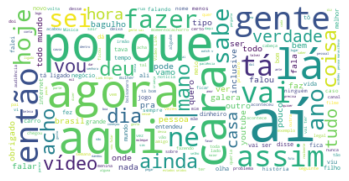

In [158]:
#wordcloud - [WORK IN PROGRESS]
text = open('texto.txt').read()



stop_words = stop_words + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [161]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import tokenize

# Lista de palavras para ignorar usando os pacotes do NLTK
stop_words = nltk.corpus.stopwords.words('portuguese')

In [165]:
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token for token in tokens if (len(token) >= 2)] # Pega apenas palavras maiores que três letras
    return words

In [168]:
textblob_tokenizer(text)


**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt/PY3/english.pickle

  Searched in:
    - '/Users/luizfernandotoledo/nltk_data'
    - '/Users/luizfernandotoledo/.pyenv/versions/3.9.7/nltk_data'
    - '/Users/luizfernandotoledo/.pyenv/versions/3.9.7/share/nltk_data'
    - '/Users/luizfernandotoledo/.pyenv/versions/3.9.7/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [164]:
vec = CountVectorizer(tokenizer=textblob_tokenizer,
                      stop_words=stop_words)


matrix_candidate = vec.fit_transform(text)

candidate_words = pd.DataFrame(matrix_candidate.toarray(), columns=vec.get_feature_names())

ValueError: Iterable over raw text documents expected, string object received.